# Installing Dependencies

In [8]:
#!pip install numpy

In [9]:
#!pip install pandas

In [10]:
#!pip install seaborn

In [11]:
#!pip install sklearn

In [12]:
#!pip install matplotlib

# Importing the Libraries

In [13]:
# will hide errors like outdated verisions
import warnings
warnings.filterwarnings('ignore')

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [15]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('gold_price_data.csv')

In [16]:
df = data.copy() # creating a copy for further use

In [17]:
# print first 5 rows in the dataframe
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
# print last 5 rows of the dataframe
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [19]:
# number of rows and columns
data.shape

(2290, 6)

In [20]:
# getting some basic informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [21]:
# checking the number of missing values in Gold Data 
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [22]:
data.duplicated().sum() # checking the duplicate values in Gold Data 


0

In [23]:
# getting the statistical measures of the Gold data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation -> Rising values in one variable align with increasing values in another
2. Negative Correlation -> Rising values in one variable align with decreasing values in another

In [24]:
data = data.drop(["Date"], axis=1)
correlation = data.corr()

<AxesSubplot:>

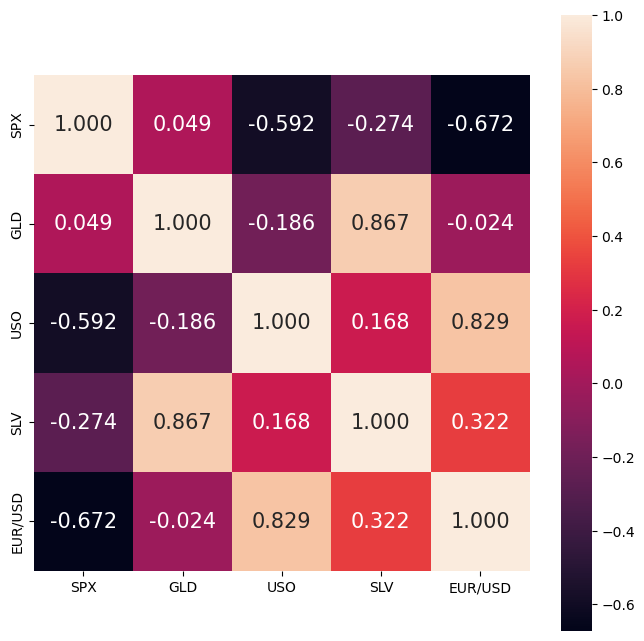

In [25]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.3f',annot=True, annot_kws={'size':15})

In [26]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

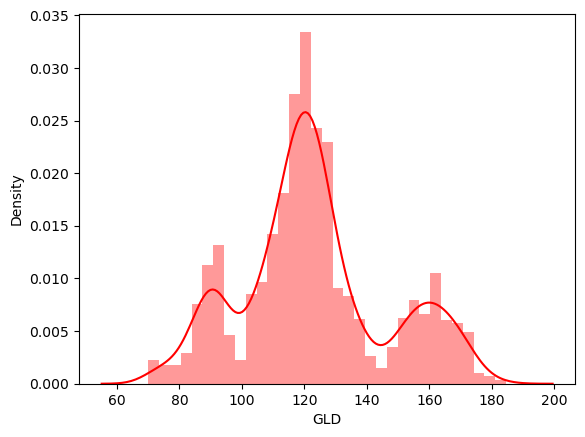

In [27]:
# checking the distribution of the GLD Price
sns.distplot(data['GLD'],color='red')

Splitting the Features and Target

In [28]:
# df is copy of data we created above
A = df.drop(['Date','GLD'],axis=1)
B = df['GLD']

In [29]:
print(A)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [30]:
print(B)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size = 0.2, random_state=42)

Model Training:
Random Forest Regressor

#### (n_estimators) represents number of trees in forest. Usually the higher number of trees better to learn data.

In [32]:
regressor = RandomForestRegressor(n_estimators=500)

In [33]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=500)

Model Evaluation

In [34]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [35]:
print(test_data_prediction)

[122.52327952 130.304043   127.59585973  96.62029752 118.88230067
 114.51649934 124.80064135 117.76893938 107.999661    98.27755976
  95.42369946 167.64089843 149.85502104 116.0791604  170.8551214
  84.99487995 123.04283877 109.20153691 113.23156063 131.60978309
 124.28071898 113.58468081 115.74610064 108.71403978 108.63094152
 125.82005919 119.29839969 112.42713932 113.46574146 125.51361907
 146.13962138  89.52797991 167.83679966 113.70511939 108.38646089
 120.19368108 142.05367888 161.29268118 173.98685804 153.16214123
 119.38716115 113.43430063 121.35845936 113.63401927 122.02704787
 107.92072072  88.24379907 114.48285927 129.79902224 118.01186096
 103.85680003 129.83220235 107.14135863 160.39522357 131.81202007
 118.09345979 146.85170078 134.86124216  95.66884112 124.58786146
 115.00935881  86.23888078 104.28515912 113.86670078  84.14507926
 122.26272788 116.56953918 113.57880203 165.19996261  92.31452021
  80.23238101 161.051221   158.97050209 106.98395999 149.13640094
 109.751137

In [36]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score * 100)

R squared error :  98.98409601977704


Compare the Actual Values and Predicted Values in a Plot

In [37]:
Y_test = list(Y_test)

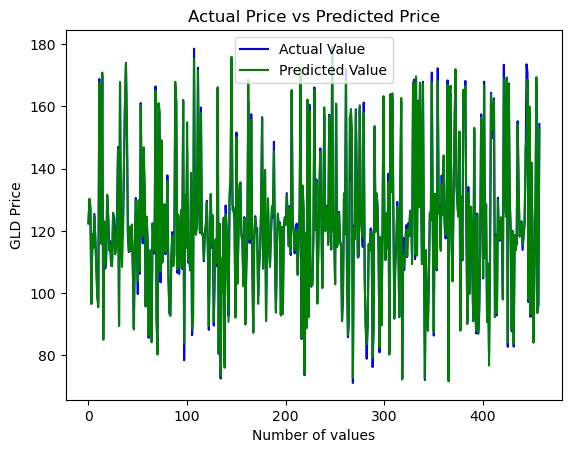

In [38]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()